# 常見於迴歸問題的評估指標

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

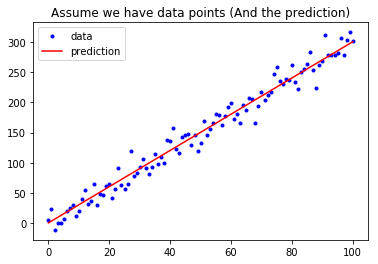

In [6]:
w = 3
b = 0.5
#Create 0~100 1D Array
x_lin = np.linspace(0, 100, 101)

# randn(row,column,ndim):函数返回一個或一组樣本，具有標準正態分布
# rand(row,column,ndim):函數根據给定维度生成[0,1)之间的數據，包含0，不包含1
y = (x_lin + np.random.randn(101) * 5) * w + b
y_hat = x_lin * w + b
plt.plot(x_lin, y, 'b.', label = 'data')
plt.plot(x_lin, y_hat, 'r-', label = 'prediction')
plt.title("Assume we have data points (And the prediction)")
plt.legend(loc = 2)
plt.show()

## 1.Mean Absolute Error (MAE)

In [7]:
def mean_absolute_error(y, yp):
    """
    計算 MAE
    Args:
        - y: 實際值
        - yp: 預測值
    Return:
        - mae: MAE
    """
    mae = MAE = sum(abs(y - yp)) / len(y)
    return mae



In [8]:
mean_absolute_error(y,y_hat)

11.783243320413186

## 2.Mean Squared Error (MSE)

In [9]:
def mean_squared_error(y, yp):
    """
    計算 MSE
    Args:
        - y: 實際值
        - yp: 預測值
    Return:
        - mse: MSE
    """
    mse = sum((y - yp)**2) / len(y)
    return mse

In [10]:
mean_squared_error(y, y_hat)

223.82673717318104

## 3.R Square

In [15]:
def R_Square(y,y_hat):
    ybar = np.sum(y)/len(y)          # or sum(y)/len(y)
    sse = np.sum((y_hat-y)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
    sst = np.sum((y - ybar)**2)
    r2 = 1-(sse/sst)
    return r2

In [16]:
R_Square(y,y_hat)

0.9723458939428584

# 4.Cross-Validation 

### sklearn.cross_validation.cross_val_score # K折交叉驗證模塊

# 常見於分類問題的評估指標

## 1.Cross-Validation

## sklearn.cross_validation.cross_val_score # K折交叉驗證模塊

# 常見於機率分布的評估指標

## CDF(Cumulative Distribution Function) : 累計分布函數

### 對於一維數據的可視化，直方圖(Histogram)與核密度估計(Kernel Density Estimates)可以很好的表示各個數據值的概率分佈，但在表示數據累積分佈上這兩種方法就無能為力了。數據的累積分佈，也即小於等於當前數據值的所有數據的概率分佈，對於表示數據點在某個區間內出現的概率有很大的幫助。從數學上來說，累積分佈函數(Cumulative Distribution Function, 簡稱CDF)是概率分佈函數的積分；而在繪製累積分佈函數的時候，由於真實的概率分佈函數未知，因此往往定義為直方圖分佈的積分

## ECDF(Empirical Cumulative Distribution Function) : 經驗累計分布函數

### 相較於CDF，根據觀察值而來的，也即具體描繪出來的CDF曲線是根據各個數據點的加和而得到的

In [22]:
def ecdf(data):
    
    """Compute ECDF for a one-dimensional array of measurements."""
 
 
    # Number of data points: n
    n = len(data)
 
 
    # x-data for the ECDF: x
    x = np.sort(data)
 
 
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
 
    return x, y


In [23]:
import os
# 設定 data_path
dir_data = '../DataAnalysisTool/'
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)


Path of read in data: ../DataAnalysisTool/application_train.csv


無log


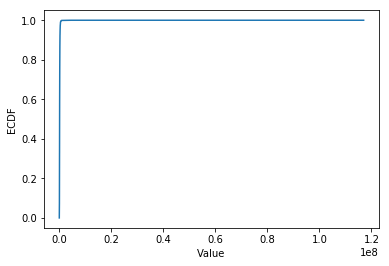

In [25]:
print("無log")
x, y = ecdf(app_train['AMT_INCOME_TOTAL'])
plt.plot(x, y)
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.show()

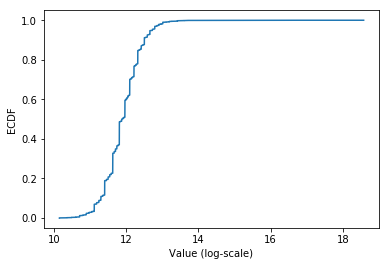

In [26]:
plt.plot(np.log(list(x)), y/y.max())
plt.xlabel('Value (log-scale)')
plt.ylabel('ECDF')

plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()